In [39]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [74]:
def make_radiation_hourly(df):
    # Convert 'D' to datetime
    df['D'] = pd.to_datetime(df['D'], format='%Y-%m-%d %H:%M:%S')
    # Shift 'Rsw' for hourly calculation (highest value per day is now at 23:00)
    df['Rsw_shifted'] = df['Rsw'].shift(-1)
    # Calculate hourly radiation
    df['Hourly_Radiation'] = df.groupby(df['D'].dt.date)['Rsw_shifted'].diff().fillna(df['Rsw_shifted'])
    # Create a new DataFrame for shifted data
    shifted_df = pd.DataFrame()
    shifted_df['D'] = df['D'] + pd.DateOffset(hours=1)
    shifted_df['Rsw'] = df['Rsw'].shift(-1)
    shifted_df['Rsw'] = df['Hourly_Radiation'].shift(0)
    # Merge shifted data with original data for other columns
    df = pd.merge(shifted_df, df[['Pr', 'Ta', 'N', 'D']], on='D', how='left')
    # make sure dimentions allign
    df = df.drop(df.index[-1])
    # start only after day 1 in the dataset
    # df = df.drop(df.index[-1])
    # df = df.set_index('D')
    df = df.iloc[23:]
    return df

In [ ]:
%%time
base_dir = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/TL_data'

# Define the landcovers and locations
landcovers = ['1', '2', '3', '4', '5']
locations = ['langtang', 'mustang']

# Iterate over landcovers
for landcover in landcovers:
    # Iterate over locations
    for location in locations:
        # Construct the path to the landcover and location folder
        landcover_dir = f"{landcover}landcover"
        location_folder = f"{location}_climate_cut"
        
        # Construct the full path to the folder
        folder_path = os.path.join(base_dir, landcover_dir, location_folder)
        
        # Check if the folder exists
        if not os.path.exists(folder_path):
            print(f"Folder not found: {folder_path}")
            continue
        
        # Iterate over the subfolders (e.g., 12a, 12b, etc.)
        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder)
        # Skip hidden folders or files that start with "."
            if subfolder.startswith("."):
                continue
    
        
            print(subfolder_path)
            # Check if the subfolder is a directory
            if os.path.isdir(subfolder_path):
                # Construct the path to the .met file inside the subfolder
                met_file_path = os.path.join(subfolder_path, f"climatefile.{subfolder}.met")
                # print(met_file_path)
                # Check if the .met file exists
                # if not os.path.exists(met_file_path):
                #     print(f"File not found: {met_file_path}")
                #     continue
                # print(met_file_path)
                # Load the .met file into a DataFrame
                df = pd.read_csv(met_file_path, sep=",")  # Adjust `sep` if needed
                # print(df.head())
                df = make_radiation_hourly(df)

                # # Save the updated DataFrame back to the same file
                df.to_csv(met_file_path, index=False, sep=",")
                print(f"Updated: {subfolder_path}")


/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/TL_data/1landcover/langtang_climate_cut/19b
Updated: /Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/TL_data/1landcover/langtang_climate_cut/19b
/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/TL_data/1landcover/langtang_climate_cut/13b
Updated: /Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/TL_data/1landcover/langtang_climate_cut/13b
/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/TL_data/1landcover/langtang_climate_cut/19c
Updated: /Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/TL_data/1landcover/langtang_climate_cut/19c
/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/TL_data/1landcover/langtang_climate_cut/19d
Updated: /Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/TL_data/1landcover/langtang_climate_cut/19d
/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/TL_data/1landcover/langtang_climate_cut/13d
Updated: /Users/var

In [57]:
testpath = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/TL_data/3landcover/langtang_climate_cut/12b/'



testfile = pd.read_csv(testpath + 'climatefile.12b.met')

<AxesSubplot:>

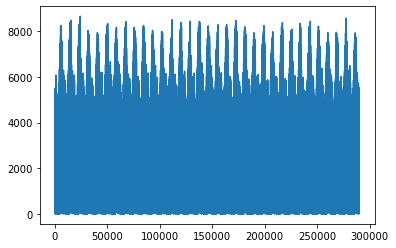

In [58]:
testfile.Rsw.plot()

In [59]:
len(testfile)
test = testfile.drop(testfile.index[-1])

In [60]:
test

,D,Pr,Ta,Rsw,N
0,1989-09-01 00:00:00,0.009842,8.535626,4437.348889,0.962373
1,1989-09-01 01:00:00,0.021085,9.098986,31.793333,0.984652
2,1989-09-01 02:00:00,0.032336,9.880386,151.806944,0.970140
3,1989-09-01 03:00:00,0.040766,11.077586,469.885556,0.989474
4,1989-09-01 04:00:00,0.029519,11.842296,923.874722,0.974672
...,...,...,...,...,...
289986,2022-09-30 18:00:00,0.085391,6.116826,5485.033333,0.242506
289987,2022-09-30 19:00:00,0.003714,6.228346,5485.033333,0.160714
289988,2022-09-30 20:00:00,0.001237,6.069996,5485.033333,0.126288
289989,2022-09-30 21:00:00,0.000000,5.824356,5485.033333,0.100179


In [48]:
testpath2 = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/model_runs_notebooks2/for_jacob/langtang_climate_cut/12a/'
testfile2 = pd.read_csv(testpath2 + 'climatefile.19b.met').dropna()

In [49]:
len(testfile2)

289967

In [50]:
testfile2

,D,Rsw,Pr,Ta,N
0,1989-09-02 00:00:00,0.000000,0.000000,10.285262,0.895185
1,1989-09-02 01:00:00,37.235556,0.000000,10.417982,0.719487
2,1989-09-02 02:00:00,168.849444,0.000004,11.709852,0.371829
3,1989-09-02 03:00:00,373.216389,0.000000,12.780842,0.586012
4,1989-09-02 04:00:00,549.226389,0.005621,13.479662,0.850841
...,...,...,...,...,...
289962,2022-09-30 18:00:00,0.000000,0.034653,7.007602,0.334368
289963,2022-09-30 19:00:00,0.000000,0.004951,7.224962,0.242536
289964,2022-09-30 20:00:00,0.000000,0.000000,6.793502,0.210003
289965,2022-09-30 21:00:00,0.000000,0.000000,6.691732,0.107885


In [51]:
dataframe = testfile2.iloc[23:]


In [52]:
dataframe

,D,Rsw,Pr,Ta,N
23,1989-09-02 23:00:00,0.000000,0.001408,8.359542,0.980898
24,1989-09-03 00:00:00,0.000000,0.000000,8.548872,0.989260
25,1989-09-03 01:00:00,51.700000,0.001405,9.339602,0.912093
26,1989-09-03 02:00:00,240.313611,0.000004,11.687582,0.795632
27,1989-09-03 03:00:00,478.335278,0.004217,13.327442,0.683734
...,...,...,...,...,...
289962,2022-09-30 18:00:00,0.000000,0.034653,7.007602,0.334368
289963,2022-09-30 19:00:00,0.000000,0.004951,7.224962,0.242536
289964,2022-09-30 20:00:00,0.000000,0.000000,6.793502,0.210003
289965,2022-09-30 21:00:00,0.000000,0.000000,6.691732,0.107885


In [70]:
dfpath = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/model_runs_notebooks2/for_jacob/langtang_climate_cut/12a/'

df = pd.read_csv(dfpath + 'climatefile.12a.met')


In [71]:
def make_radiation_hourly(df):
    # Convert 'D' to datetime
    df['D'] = pd.to_datetime(df['D'], format='%Y-%m-%d %H:%M:%S')
    # Shift 'Rsw' for hourly calculation (highest value per day is now at 23:00)
    df['Rsw_shifted'] = df['Rsw'].shift(-1)
    # Calculate hourly radiation
    df['Hourly_Radiation'] = df.groupby(df['D'].dt.date)['Rsw_shifted'].diff().fillna(df['Rsw_shifted'])
    # Create a new DataFrame for shifted data
    shifted_df = pd.DataFrame()
    shifted_df['D'] = df['D'] + pd.DateOffset(hours=1)
    shifted_df['Rsw'] = df['Rsw'].shift(-1)
    shifted_df['Rsw'] = df['Hourly_Radiation'].shift(0)
    # Merge shifted data with original data for other columns
    df = pd.merge(shifted_df, df[['Pr', 'Ta', 'N', 'D']], on='D', how='left')
    # make sure dimentions allign
    df = df.drop(df.index[-1])
    # start only after day 1 in the dataset
    # df = df.drop(df.index[-1])
    # df = df.set_index('D')
    df = df.iloc[23:]
    return df

In [72]:
df1 = make_radiation_hourly(df)

In [73]:
df1

,D,Rsw,Pr,Ta,N
23,1989-09-02 00:00:00,0.000000,0.000000,4.331626,0.668520
24,1989-09-02 01:00:00,36.089722,0.000000,4.369676,0.796334
25,1989-09-02 02:00:00,145.219167,0.000004,5.255046,0.835261
26,1989-09-02 03:00:00,315.214444,0.001404,6.226726,0.898604
27,1989-09-02 04:00:00,483.061667,0.030927,6.941326,0.979754
...,...,...,...,...,...
289986,2022-09-30 19:00:00,0.000000,0.003714,1.346846,0.160714
289987,2022-09-30 20:00:00,0.000000,0.001237,1.188496,0.126288
289988,2022-09-30 21:00:00,0.000000,0.000000,0.942856,0.100179
289989,2022-09-30 22:00:00,0.000000,0.001237,0.680256,0.164682
